
# Gradiente, matriz xacobiana, funcións diferenciables


In [2]:
import time
print(' Última execución  ', time.asctime() )

 Última execución   Mon Feb  5 16:49:03 2024



### Obxectivos

Presentar os conceptos de:
-  gradiente e matriz xacobiana
-  definición de función diferenciable

Discutir sobre:
-  A condición suficiente de diferenciabilidade
-  os beneficios das funcións diferenciables


*Nota*

Para que este notebook funcione en colab, precisamos <a href = "https://www.dropbox.com/scl/fi/wwz2w43kqj0s38gm87roj/graph_utils.py?rlkey=rppkwu9tmbnnsojezzj69p1r0&dl=1"> graph_utils.py</a> e <a href = "https://www.dropbox.com/scl/fi/birg6qcdowsjcdpaavzas/common_functions.py?rlkey=wpa0zg8gwyr6pj7b6d02onclu&dl=1"> common_functions.py</a>. Podes descargalos premendo na ligazón, e subilos a colab:


<img src="https://www.dropbox.com/scl/fi/b35vcated0f9lwrw4jy01/colab_upload.jpg?rlkey=l1ag15r0ovkg2dsefze117k1y&raw=1" width=200 align="center" />

In [3]:
# general imports
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'


### Gradiente

 Para unha función escalar diferenciable $f(x, y)$, demos a expansión de Taylor nun punto $(x_0, y_0)$ se movemos un vector $(v _x, v_y)$ no espazo orixe.

$$
f((x_0, y_0) + (v_x, v_y)) \simeq f(x_0, y_0) + f'_x(x_0, y_0) v_x + f'_y (x_0, y_0) v_y
$$



Ou o que é o mesmo:

$$
f((x_0, y_0) + (v_x, v_y)) \simeq f(x_0, y_0) + \left(f'_x(x_0, y_0), \, f'_y (x_0, y_0) \right) \, (v_x, v_y)
$$

 Onde a expresión:

$$
\left(f'_x(x_0, y_0), \, f'_y (x_0, y_0) \right) \, (v_x, v_y)
$$

 É o produto escalar entre $(v_x, v_y)$, o vector de desprazamento; e outro vector, o **gradiente** , $\nabla f (x_0, y_0)$, con compoñentes iguais ás derivadas parciais:
 
$$
\nabla f(x_0, y_0) = \left(f'_x(x_0, y_0), \, f'_y (x_0, y_0) \right) = \left( \frac{\partial f(x_0, y_0)}{\partial x}, \frac{\partial f (x_0, y_0)}{\partial y} \right)
$$





O gradiente aparécenos con frecuencia en Física. En electromagnetismo definimos o campo eléctrico como (menos) o gradiente do potencial.

$$
{\bf E}({\bf x}) = - \nabla V({\bf x})
$$

 Podes comprobar que este é realmente o caso, baseándonos na definición de potencial e campo eléctrico que vimos na sección de funcións escalares e vectoriais.



*Exemplo* : A seguinte figura móstranos os conxuntos de nivel do potencial eléctrico dunha carga.

 Tamén nos mostra o campo eléctrico, (o gradiente cambiou de signo), nun determinado punto $(x_0, y_0)$

 *Explora* e cambia o punto e mira como cambia o gradiente.


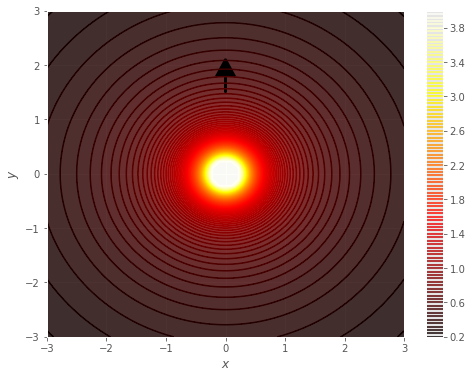

In [4]:
x0, y0 =  0., 1.5
V  = lambda x, y : 1/(x*x + y*y)**(1/2)
Ex = lambda x, y : x/(x*x + y*y)**(3/2)
Ey = lambda x, y : y/(x*x + y*y)**(3/2)
gf.contour(V, contours = 100, zlim=(0., 4));
gf.arrow(x0, y0, Ex(x0, y0), Ey(x0, y0));


Por suposto, o que vimos para funcións escalares bidimensionais é valido para calquera dimensión.

 Sexa unha función $f({\bf x})$ unha función escalar definida en $\mathbb{R}^n$, diremos que é "suave", se ten unha expansión de Taylor de primeira orde, isto é, a función nun punto ${\bf x}$ próximo a ${\bf x}_0$, relacionado por un vector "pequeno", ${\bf v}$, mediante ${\bf x} = {\bf x}_0 + {\bf v}$, pódese aproximar mediante un hiperplano.

 $$
 f({\bf x}_0 + {\bf v} ) \simeq f({\bf x_0}) + \nabla f ({\bf x_0}) \, {\bf v}
 $$

 onde as derivadas parciais son as pendentes en cada dirección, $f'_i ({\bf x}_0)$.



*Exercicio* : Calcula o gradiente das seguintes funcións:
1.  $f(x, y) = e^{x + y}$
1.  $f(x, y) = \cos x \sin y$


*Solución*:
    
1. $\nabla f(x, y) = \left( e^{x+y}, \; e^{x+y} \right)$

2. $\nabla f(x, y) = \left( -\sin x \sin y, \; \cos x \cos y \right)$



O gradiente dános máis información sobre a función. Observa:

 O termo:

 $$
 \nabla f ({\bf x}_0) \, {\bf v}
 $$

 é un produto escalar que podemos reescribir como:

 $$
 \nabla f ({\bf x}_0) \, {\bf v} = || \nabla f({\bf x}_0) || \, ||{\bf v}|| \, \cos \theta
 $$

 onde $\theta$ é o ángulo formado polos dous vectores.



Agora temos dous casos:

1. Os dous vectores son paralelos, se van na mesma dirección e dirección, o valor é máximo.

É dicir, se o desprazamento $ {\bf v} $ vai na mesma dirección e sentido que o gradiente, o cambio da función é máximo.
 
2. Os dous vectores son perpendiculares, o termo é nulo.

Ou o que é o mesmo, o valor da función non cambiará ortogonalmente ao gradiente.



Volvamos á relación entre o campo e o potencial eléctrico:

 $$
 {\bf E}({\bf x}) = - \nabla V({\bf x})
 $$

 O gradiente indica entón a dirección e o sentido no que o potencial eléctrico *decae* máis rapidamente.



Agora lembremos os conxuntos de nivel, que son aqueles puntos do espazo inicial para os cales o valor da función é $c$.

 O gradiente vai ser normal aos conxuntos de nivel, porque nestes o valor da función non cambia.



*Exemplo* : A seguinte figura móstranos os conxuntos de nivel dun dipolo eléctrico. Tamén nos mostra o campo eléctrico, (o gradiente cambiou de signo), nun determinado punto $(x_0, y_0)$

 *Explora* e cambia o punto e mira como cambia o gradiente.


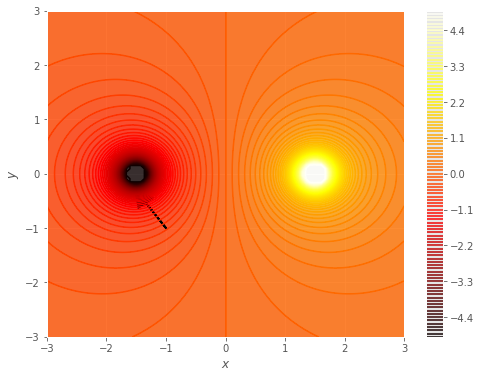

In [5]:
from common_functions import edipole
x0, y0 = -1, -1.
V, Ex, Ey = edipole(1., 1.5, 0., -1.5, 0.)
gf.contour(V, contours= 100, zlim=(-5., 5.))
gf.arrow(x0, y0, Ex(x0, y0), Ey(x0, y0));


A seguinte cela permíteche debuxar o potencial dun conxunto de cargas. O debuxo corresponde a dúas cargas negativas situadas no eixe vertical separadas por 2 unidades.

 *Explora* e cambia o punto e mira como cambian o potencial e o gradiente.

 *Explora* e cambia o sistema de cargas para ver como cambian o potencial e o gradiente nun punto.


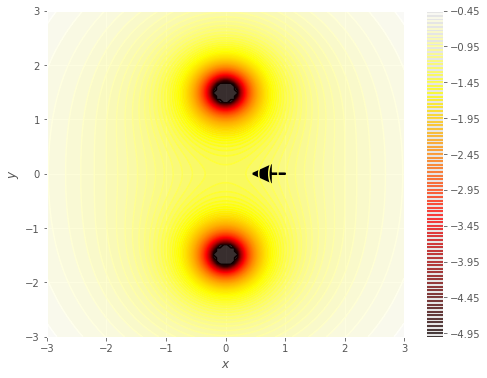

In [6]:
from common_functions import esystem
x0, y0 = 1.0, 0.0 
charges = [(-1., 0, 1.5), (-1., 0, -1.5)]
V, Ex, Ey = esystem(charges)
gf.contour(V, contours = 100, zlim=(-5., 5.))
gf.arrow(x0, y0, Ex(x0, y0), Ey(x0, y0));

### Matriz Xacobiana

 Unha función vectorial é diferenciable se e só se cada unha das súas funcións compoñentes é diferenciable.

 Sexa unha función vectorial, ${\bf f}({\bf x})$ de $\mathbb{R}^n \to \mathbb{R}^m$, que é diferenciable nun punto ${\bf x }_0 $

 cada unha das súas funcións compoñentes debe ser diferenciable, poñémolas unha debaixo da outra:


$$
f_1( {\bf x}_0 + {\bf v}) \approx f_1({\bf x}_0) + \nabla f_1({\bf x}_0) {\bf v}
$$
$$
\dots
$$
$$
f_m( {\bf x}_0 + {\bf v}) \approx f_m({\bf x}_0) + \nabla f_m({\bf x}_0) {\bf v}
$$

Ou tamén: 

$$
f_1( {\bf x}_0 + {\bf v}) \approx f_1({\bf x}_0) + \sum _{i=1, n} \frac{\partial f_1({\bf x}_0)}{\partial x_i} v_i
$$ 
$$ 
\dots
$$   
$$  
f_m( {\bf x}_0 + {\bf v}) \approx f_m({\bf x}_0) + \sum_{i=1, n} \frac{\partial f_m({\bf x}_0)}{\partial x_i} v_i
$$




Que podemos reescribir en forma de matriz, colocando ${\bf v}$, ${\bf f}({\bf x}_0 + {\bf v})$ e ${\bf f}({\bf x } _0)$ como vectores columna.

 $$
 {\bf f} ({\bf x}_0 + {\bf v}) = {\bf f}({\bf x}_0) + {\bf Df}({\bf x}_0) \, { \bf v}
 $$

 Onde ${\bf Df}({\bf x}_0)$ é unha matriz con elementos:

 $$
 {\bf Df}_{ij}({\bf x}_0) = \frac{\partial f_i ({\bf x_0})}{ \partial x_j}
 $$

 *Pregunta* : Se observas as filas da matriz xacobiana, a que corresponden?



*Exercicio* : Calcula a matriz xacobiana da seguinte función vectorial:

 $$
 {\bf f}(x, y) = \left( e^{x+y}, \cos x \sin y \right)
 $$


*Solución*:
    
${\bf Df}(x, y) = \left( \begin{array}{cc} e^{x+y} & e^{x+y} \\ -\sin x \sin y & \cos x \cos y \end{array} \right)$




Recapitulemos:
-  Se unha función escalar, $f({\bf x})$ é diferenciable, podemos aproximala nun punto ${\bf x}_0$ e nunha dirección ${\bf v}$ por:

 $$
 f({\bf x}_0 + {\bf v}) \approx f({\bf x}_0) + \nabla f ({\bf x}_0) \, {\bf v}
 $$

 onde $\nabla f {\bf x}_0$ é o gradiente:

 $$
 \nabla f (x_0, y_0) = \left( \frac{\partial f(x_0, y_0)}{\partial x}, \frac{f (x_0, y_0)}{\partial y} \right)
 $$
 


 
-  Se unha función vectorial, ${\bf f}({\bf x})$ é diferenciable, podemos aproximala nun punto ${\bf x}_0$ e nunha dirección ${\bf v}$ por:

 $$
 {\bf f}({\bf x}_0 + {\bf v}) \approx {\bf f}({\bf x}_0) + {\bf Df}({\bf x}_0) \, {\bf v}
 $$

 onde ${\bf Df}({\bf x}_0)$ é a matriz xacobiana:

 $$
 {\bf Df}_{ij}({\bf x}_0) = \frac{\partial f_i ({\bf x_0})}{ \partial x_j}
 $$



Xa coñeces con certeza de Física polo menos unha matriz xacobiana. Sabes cal?


A velocidade!

Se temos unha traxectoria dun móbil no espazo en función do tempo:

$$
{\bf r}(t) = \left( \begin{array}{c} x(t) \\ y(t) \\ z(t) \end{array} \right) 
$$

Na notación anterior, a matriz xacobiana é:

$$
{\bf Dr}(t) = {\bf r}'(t) =  \left( \begin{array}{c} x'(t) \\ y'(t) \\ z'(t) \end{array} \right) 
$$

Polo tanto, a expansión de Taylor é:

$$
{\bf r}(t_0 + \Delta t) \approx {\bf r}(t_0) + {\bf r}'(t_0) \Delta t
$$


*Exemplo* : A seguinte cela debuxa a traxectoria dun móbil ao longo dunha elipse e nun punto a súa velocidade (a súa "matriz" xacobiana)

 *Explora* : podes cambiar o valor de $t_0$ e ver como cambia a velocidade.


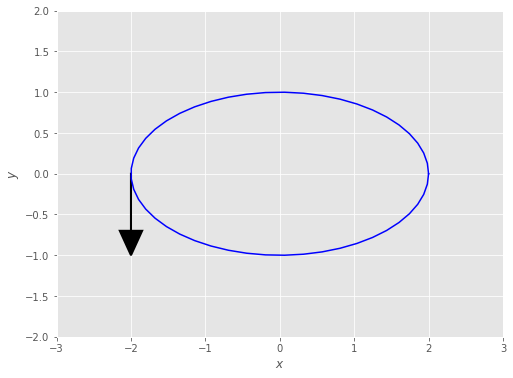

In [7]:
t0 = 4*np.pi/4.
a, b, w = 2, 1, 1
fx  = lambda t:    a*np.cos(w*t)
fy  = lambda t:    b*np.sin(w*t)
fxp = lambda t: -w*a*np.sin(w*t)
fyp = lambda t:  w*b*np.cos(w*t)
gf.line2d(fx, fy, (0, 2*np.pi));
gf.arrow(fx(t0), fy(t0), fxp(t0), fyp(t0));
plt.xlim(-a-1, a+1); plt.ylim(-b-1, b+1);

### Función diferenciable

 Vimos como son as funcións diferenciables, pero como as definimos matemáticamente? Cando unha función será diferenciable?


Sexa ${\bf f}: D \subset \mathbb{R}^n \to \mathbb{R}^m$, dicimos que a función é **diferenciable** nun punto ${\bf x}$ interior a $D$ se nunha bola centrada en ${\bf x}$ de raio $r$ e para os vectores que satisfacen $\| {\bf v} \| < r$,  existe unha *transformación lineal* ${\bf T_x}: \mathbb{R}^n \to \mathbb{R}^m$ e unha *función de erro*, ${\bf E}:\mathbb{R}^n \to \mathbb{R}^m$,  ${\bf E}({\bf x},{\bf v})$, tales que: 

$$
{\bf f}({\bf x}+{\bf v})  = {\bf f}({\bf x}) + {\bf T_x}({\bf v} )+ \| {\bf v} \| {\bf E}({\bf x},{\bf v}) 
$$

onde ${\bf E}({\bf x}, {\bf v  })$ é unha función de erro de orde $\mathcal{O}(\| {\bf v} \|)$, que cumpre:

$$
\lim_{{\bf v} \to {\bf 0}} {\bf E(x,v)} = {\bf 0} 
$$

Isto e:

$$
\lim_{{\bf v} \to {\bf 0}} \frac{ {\bf f}({\bf x}+{\bf v}) - {\bf f} ({\bf x}) - {\bf T_x}({\bf v} )}{\| {\bf v} \|}  = \lim_{{\bf v} \to {\bf 0}} {\bf E(x,v)} = {\bf 0} 
$$

 A ${\bf T_x}$ chámaselle diferencial ou **derivada** de ${\bf f}$ en ${\bf x}$.

 A expresión anterior é a **expansión de Taylor** de primeira orde de ${\bf f}({\bf x}+{\bf v})$
 


${\bf T_x}$ é a **derivada** de ${\bf f}$ en ${\bf x}$.
-  Se é unha función escalar, $f({\bf x})$, é un **gradiente** , $\nabla f({\bf x})$.
-  Se é unha función vectorial, ${\bf f}({\bf x})$, é **a matriz xacobiana** , ${\bf Df}({\bf x})$

E veremos que:

 ${\bf T_x}({\bf v})$ é a **derivada direccional** de ${\bf f}({\bf x})$ no punto ${\bf x}$ e na dirección ${\bf v}$
-  Se é unha función escalar, ${\bf T_x}({\bf v}) = \nabla f({\bf x}) {\bf v}$.
-  Se é unha función vectorial, ${\bf T_x}({\bf v}) = {\bf Df}({\bf x}) {\bf v}$



**Propiedades das funcións diferenciables**

 *Exercicios* : Proba agora os seguintes teoremas:

 *Teorema*

 Se unha función ${\bf f}({\bf x})$ de $\mathbb{R}^n \to \mathbb{R}^m$ é diferenciable nun punto interior ${\bf x}$, entón é continua nese punto.

 *Teorema*

 Se unha función ${\bf f}({\bf x})$ de $\mathbb{R}^n \to \mathbb{R}^m$ é diferenciable nun punto interior ${\bf x}$, a súa derivada direccional ao longo dun vector ${\bf v}$ vén dada por:
 
-  se a función é escalar

$$
f'({\bf x}; {\bf v}) = \nabla f ({\bf x}) \, {\bf v}
$$

-  se a función é vectorial

$$
{\bf f}'({\bf x}; {\bf v}) = {\bf Df} ({\bf x}) \, {\bf v}
$$




*Teorema:* Sexan ${\bf f,g}$ dúas funcións vectoriais definidas en $S\subset \mathbb{R}^n \to\mathbb{R}^m$; $f, g$ dous campos escalares definidos en $S'\subset \mathbf{R}^n \to \mathbf{R}$ e $\lambda$ un número real. Se son derivables nun punto ${\bf x}$, as seguintes funcións tamén son derivables, coa seguinte derivada:

$$
i ) \;\;\;  {\bf f(x)} + {\bf g(x)};  \;\;\; {\bf D[f+g](x)} = {\bf Df(x)} + {\bf Dg(x)} 
$$

$$
ii) \;\;\;  \lambda\, {\bf f(x)}; \;\;\; {\bf D[} \lambda \, {\bf f]} ({\bf x}) = \lambda \, {\bf Df(x)} 
$$

$$
iii) \;\;\; f ({\bf x}) \, g ({\bf x}); \;\;\; \nabla [f ({\bf x}) \, g({\bf x})] = \nabla f({\bf x}) \, g({\bf x}) + f({\bf x}) \, \nabla g({\bf x}) 
$$

$$
iv) \;\;\; f ({\bf x})/g ({\bf x}); \;\;\; {\text si } \; g({\bf x}) \not= 0\;\;\; \nabla [f({\bf x})/g({\bf x})] = 
\frac{\nabla f({\bf x}) g({\bf x}) - f({\bf x}) \nabla g({\bf x})}{g^2({\bf x})} 
$$


#### Condición suficiente de diferenciabilidade

 Se lembras que unha función real dunha dimensión, $f(x)$, era diferenciable, tiña expansión de Taylor, nun punto interior, $x$, se a súa derivada, $f'(x)$, era continua nun intervalo centrado nese punto $x$.

 Agora, para as funcións escalares, cúmprese:

 *Teorema* :

 Unha función $f({\bf x})$ definida nun dominio $D \subset \mathbb{R}^n \to \mathbb{R}$ é diferenciable se as súas derivadas parciais, $f'_{x_i}( {\bf x})$, son continuas nunha bola arredor de ${\bf x}$.



*Pregunta* : Na seguinte cela debuxáronse dúas funcións escalares, $f(x, y)$ de $\mathbb{R}^2 \to \mathbb{R}$, unha delas é diferenciable en todo o dominio e a outra Non . Sabes cal é a diferenciable?


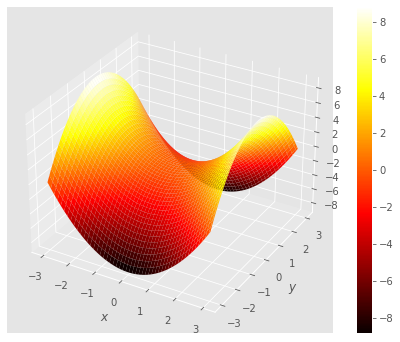

In [8]:
fun1 = lambda x, y : x*x - y*y
gf.graph(fun1);

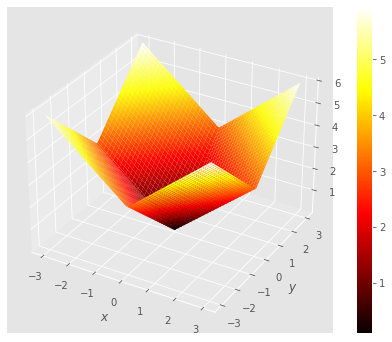

In [9]:
fun2 = lambda x, y : np.abs(x) + np.abs(y)
gf.graph(fun2);


**Isto é todo por agora!**


### Apendices

*Proba* da condición suficiente de diferenciabilidade

Demostrarémolo só en funcións escalares.

Queremos verificar


$$
f({\bf x} + {\bf v}) - f({\bf x}) - \nabla f({\bf x}) {\bf v} = {\bf E}({\bf x}, {\bf v})
$$

e que

$$
\lim_{{\bf v} \to {\bf 0}} {\bf E}({\bf x}, {\bf v}) = 0
$$

 Sexa o vector ${\bf v}$ coa norma $\lambda$ e o vector unitario ${\bf u}$. Construímos $n+1$ vectores ${\bf v}_i$, que incorporan sucesivamente cada coordenada de ${\bf v}$, comezando por ${\bf v}_0 = {\bf 0}$.

$$
{\bf v}  =  \lambda {\bf u}, \; \mathrm{con:  }\; \parallel {\bf u} \parallel = 1, \; \parallel {\bf v} \parallel = \lambda; \; {\bf v} = \lambda \sum_{k=1}^n u_{k} {\bf e}_k 
$$
$$
{\bf v}_0 =  {\bf 0} , \; {\bf v}_k  = \sum_{i=1}^k \lambda u_k; \;\; k=1,\dots,n; \; {\bf v}_n = {\bf v}
$$

Consideramos, por comodidade, os vectores:

$$
{\bf b}_k =  {\bf x} + {\bf v}_k, \; {\bf b}_k = {\bf b}_{k-1} + \lambda u_k {\bf e}_k, \; k = 1, \dots, n
$$


Reescribimos a parte esquerda da igualdade cunha suma telescópica:


$$
f({\bf x}+{\bf v}) - f({\bf x})  = f({\bf x} + {\bf v}_n) - f({\bf x} + {\bf v}_{n-1}) + \dots + f({\bf x}+{\bf v}_1) -f({\bf x}+{\bf v}_0)
$$

$$
  = \sum_{k=1}^n f({\bf x} + {\bf v}_k)-f({\bf x}+{\bf v}_{k-1})  =  \sum_{k=1}^n f({\bf b}_{k} )-f({\bf b}_{k-1}) 
  =  \sum_{k=1}^n f({\bf b}_{k-1} + \lambda u_k {\bf e}_k)-f({\bf b}_{k-1})  
$$

 Cada sumando, por exemplo: $f({\bf b}_{k-1} + \lambda u_k {\bf e} *k)-f({\bf b}* {k-1})$, é unha función dunha dimensión, na coordenada $k$.
 
Polo tanto, podemos aplicar o teorema do valor medio nun punto ${\bf c}_k$ entre ${\bf b}_{k-1} + \lambda u_k {\bf e} *k$ e ${\bf b }* { k-1}$ e sendo o ancho do intervalo $\lambda u_k$:

$$
  =  \sum_{k=1}^n f({\bf b}_{k-1} + \lambda u_k {\bf e}_k)-f({\bf b}_{k-1})   = \sum_{k=1}^n \lambda u_k f'_{k}({\bf c}_{k})
$$
 
Introducimos un sumando nulo por conveniencia, $\sum _{k=1}^n \lambda u_k \, [f'_k({\bf x}) -f'_k({\bf x})]$, en para obter o termo $\nabla f({\bf x}) \, {\bf v}$:

$$
  =  \sum_{k=1}^n \lambda u_k \, f'_k({\bf c}_k) + \sum_{k=1}^n \lambda u_k \, [f'_k({\bf x}) -f'_k({\bf x})]
$$

$$
 = \nabla f({\bf x}) \cdot {\bf v} + \lambda \sum_{k=1}^{n} [f'_k({\bf c}_k)-f'_k({\bf x}) ] u_k 
$$

Se recuperamos a expresión da función diferenciable:

$$
f({\bf x} + {\bf v}) =  f({\bf x}) + \nabla f({\bf x}) \, {\bf v} + \parallel {\bf v} \parallel E({\bf x}, {\bf v}); \; \mathrm{donde: }\; E({\bf x},{\bf v}) = \sum_{k=1}^{n} [f'_k({\bf c}_k)-f'_k({\bf x})] u_k 
$$

Cando ${\bf v} \to 0, \; \lambda \to 0$, entonces $\forall k, \: {\bf c}_k \to {\bf x}$. 

*Se as derivadas parciais* , $f'_k({\bf x})$, *son continuas,* entón ${\bf x}$, $E({\bf x},{\bf v}) \to 0$.

Polo tanto, a función é diferenciable. QED


